In [1]:
import warnings
warnings.filterwarnings('ignore')
import dynamo as dyn

In [2]:
dyn.get_all_dependencies_version()

package anndata colorcet       cvxopt dynamo-release hdbscan loompy  \
version   0.7.5    2.0.2  1.2.5.post1         0.95.2  0.8.26  3.0.6   

package matplotlib   numba numdifftools   numpy pandas pynndescent  \
version      3.3.3  0.52.0       0.9.39  1.19.3  1.2.0       0.5.1   

package python-igraph scikit-learn  scipy seaborn setuptools statsmodels  \
version         0.8.3       0.24.0  1.6.0  0.11.1     49.2.1      0.12.1   

package    tqdm      trimap umap-learn  
version  4.56.0  1.4.3.dev1      0.4.6

In [3]:
dyn.configuration.set_figure_params('dynamo', background='white')

In [5]:
adata = dyn.sample_data.zebrafish()
# adata = dyn.read_csv('data/export-hs4-pivot.csv')

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [5]:
adata

AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch'
    layers: 'spliced', 'unspliced'

In [6]:
dyn.pp.recipe_monocle(adata)

AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'initial_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'log_m', 'score', 'use_for_pca', 'ntr'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection'
    obsm: 'X_pca', 'X'
    layers: 'spliced', 'unspliced', 'X_unspliced', 'X_spliced'

In [7]:
dyn.tl.dynamics(adata, model='stochastic', cores=8)

AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'initial_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'log_m', 'score', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics'
    obsm: 'X_pca', 'X'
    layers: 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con'

<Figure size 600x400 with 0 Axes>

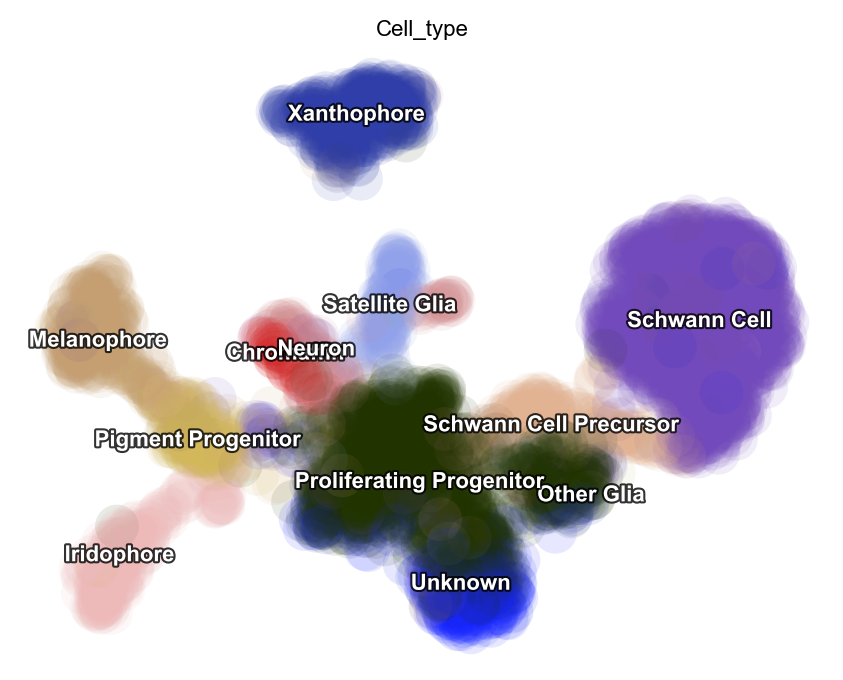

In [8]:
dyn.tl.reduceDimension(adata)

dyn.pl.umap(adata, color='Cell_type')

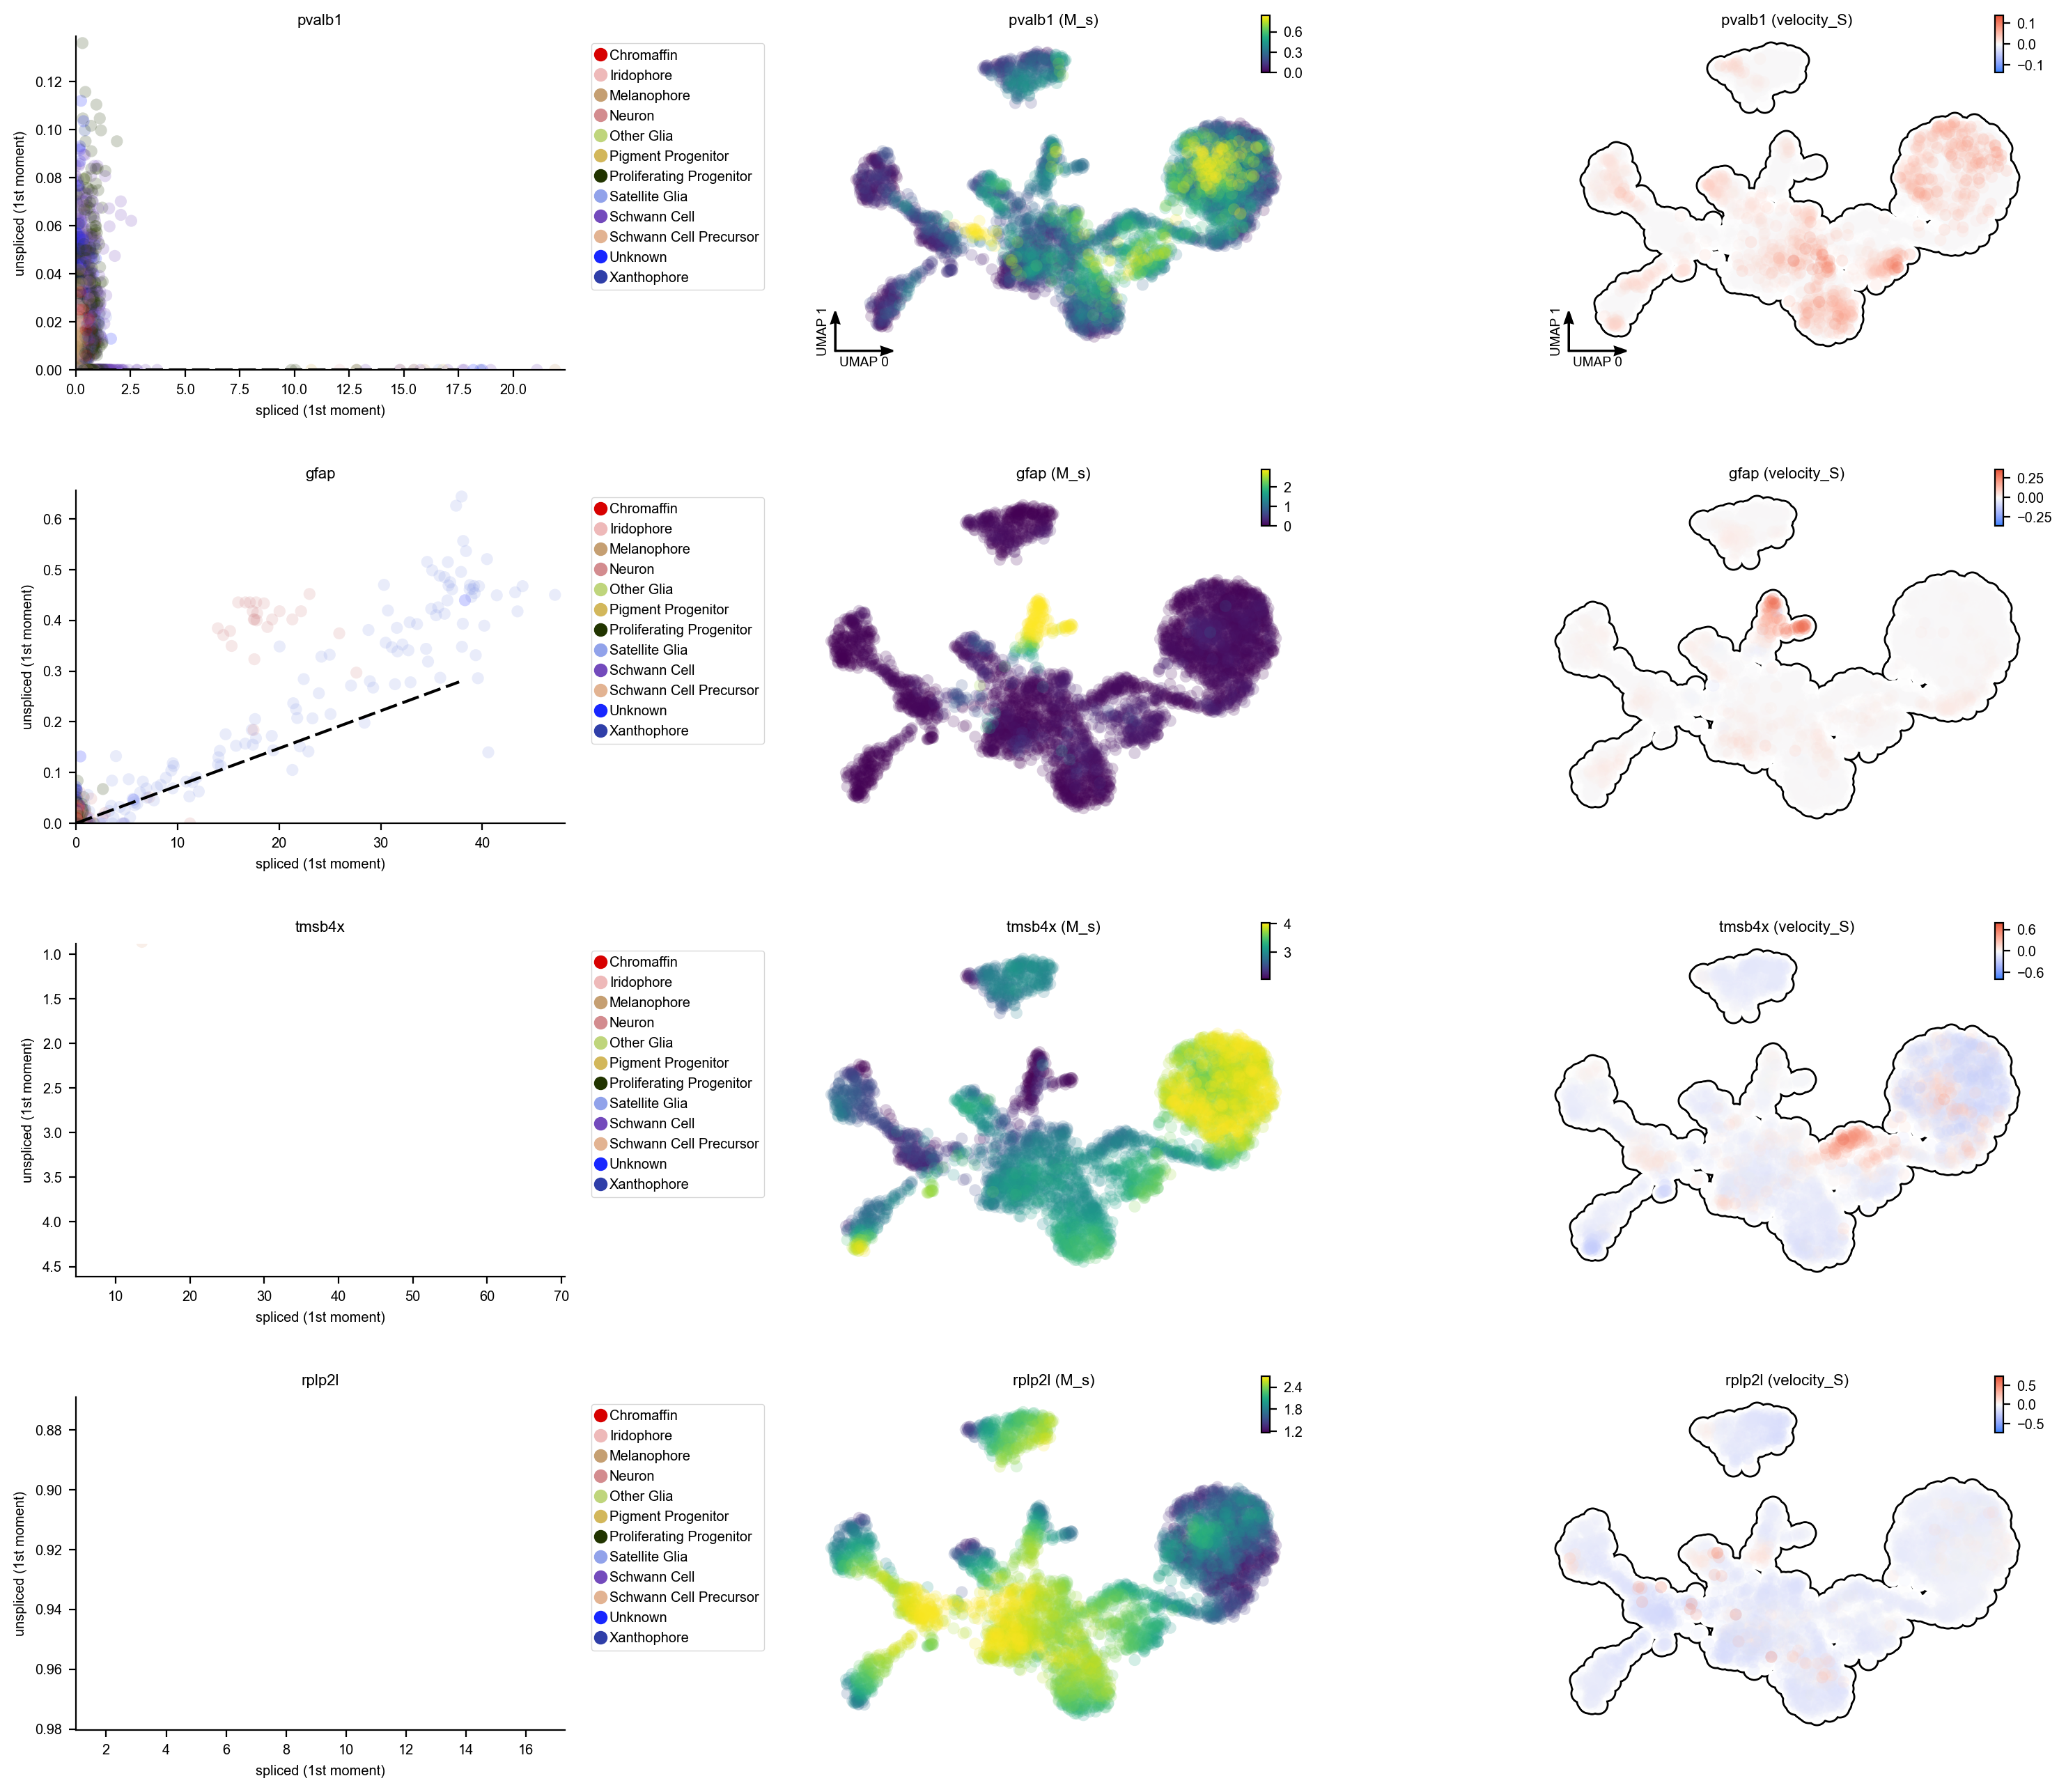

In [9]:
dyn.pl.phase_portraits(adata, genes=adata.var_names[adata.var.use_for_dynamics][:4], figsize=(6, 4), color='Cell_type')

In [10]:
dyn.tl.cell_velocities(adata, method='pearson', other_kernels_dict={'transform': 'sqrt'})

calculating transition matrix via pearson kernel with sqrt transform.: 100%|█████████████| 4181/4181 [00:12<00:00, 347.47it/s]
projecting velocity vector to low dimensional embedding...: 100%|███████████████████████| 4181/4181 [00:00<00:00, 4361.22it/s]


AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'initial_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'log_m', 'score', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap'
    obsm: 'X_pca', 'X', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 

<Figure size 600x400 with 0 Axes>

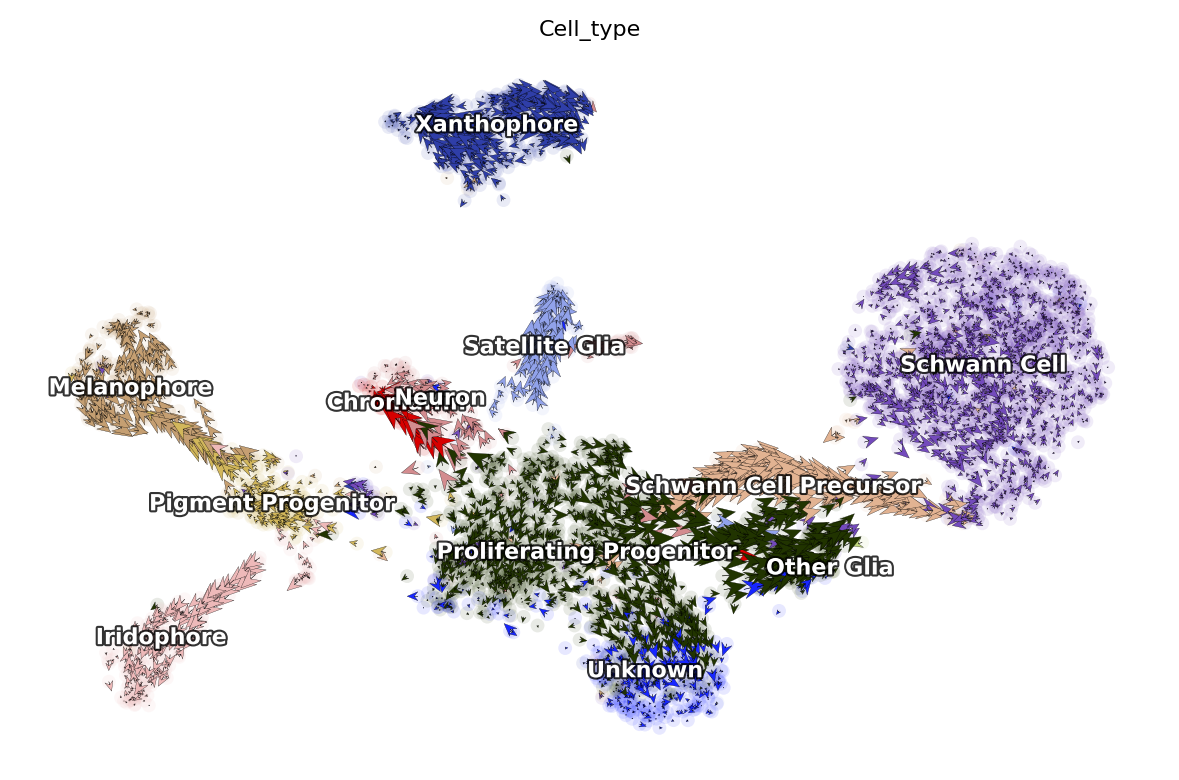

In [11]:
dyn.pl.cell_wise_vectors(adata, color=['Cell_type'], basis='umap', show_legend='on data', quiver_length=6, quiver_size=6, pointsize=0.1, show_arrowed_spines=False)

<Figure size 600x400 with 0 Axes>

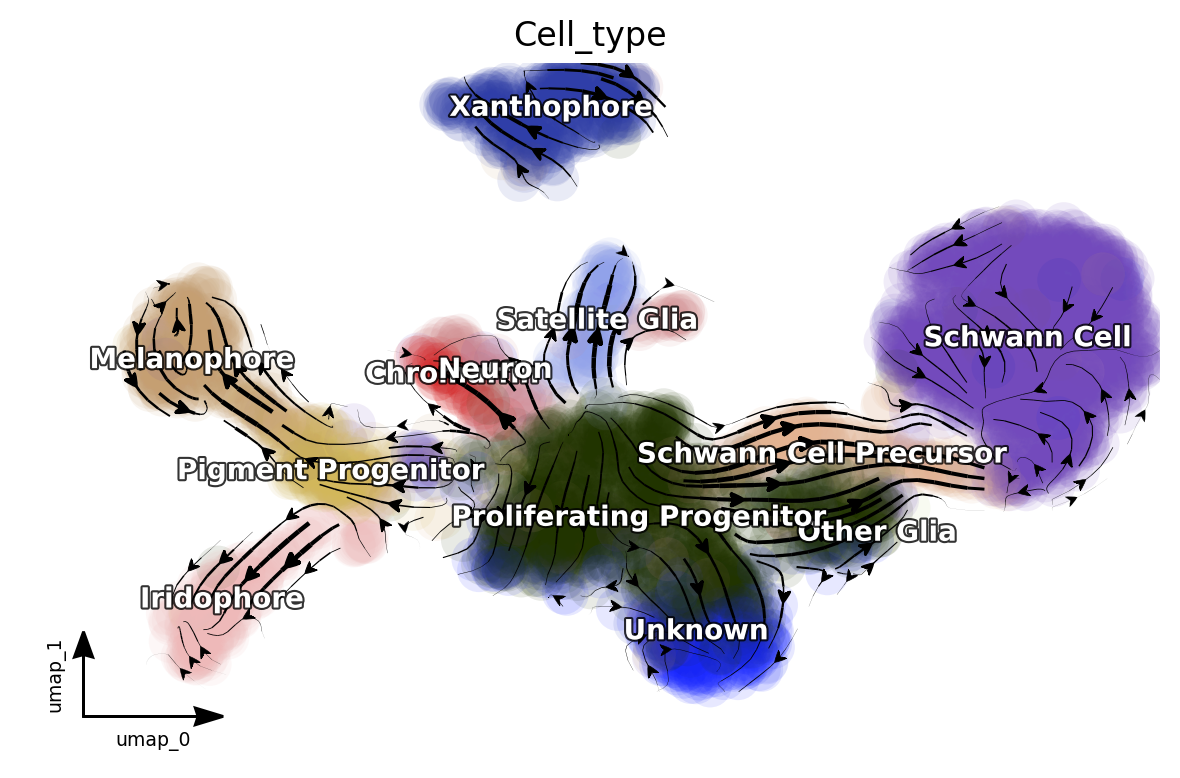

In [12]:
dyn.pl.streamline_plot(adata, color=['Cell_type'], basis='umap', show_legend='on data', show_arrowed_spines=True)

In [13]:
# you can set `verbose = 1/2/3` to obtain different levels of running information of vector field reconstruction
dyn.vf.VectorField(adata, basis='umap', M=1000, pot_curl_div=True)

Constructing diffusion graph from reconstructed vector field: 4181it [02:01, 34.40it/s]
Calculating divergence: 100%|███████████████████████████████████████████████████████████| 4181/4181 [00:00<00:00, 9346.60it/s]


AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'initial_cell_size', 'ntr', 'cell_cycle_phase', 'umap_ddhodge_div', 'umap_ddhodge_potential', 'curl_umap', 'divergence_umap', 'control_point_umap', 'inlier_prob_umap', 'obs_vf_angle_umap'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'log_m', 'score', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap', 'VecFld_umap', 'VecFld'
    obsm:

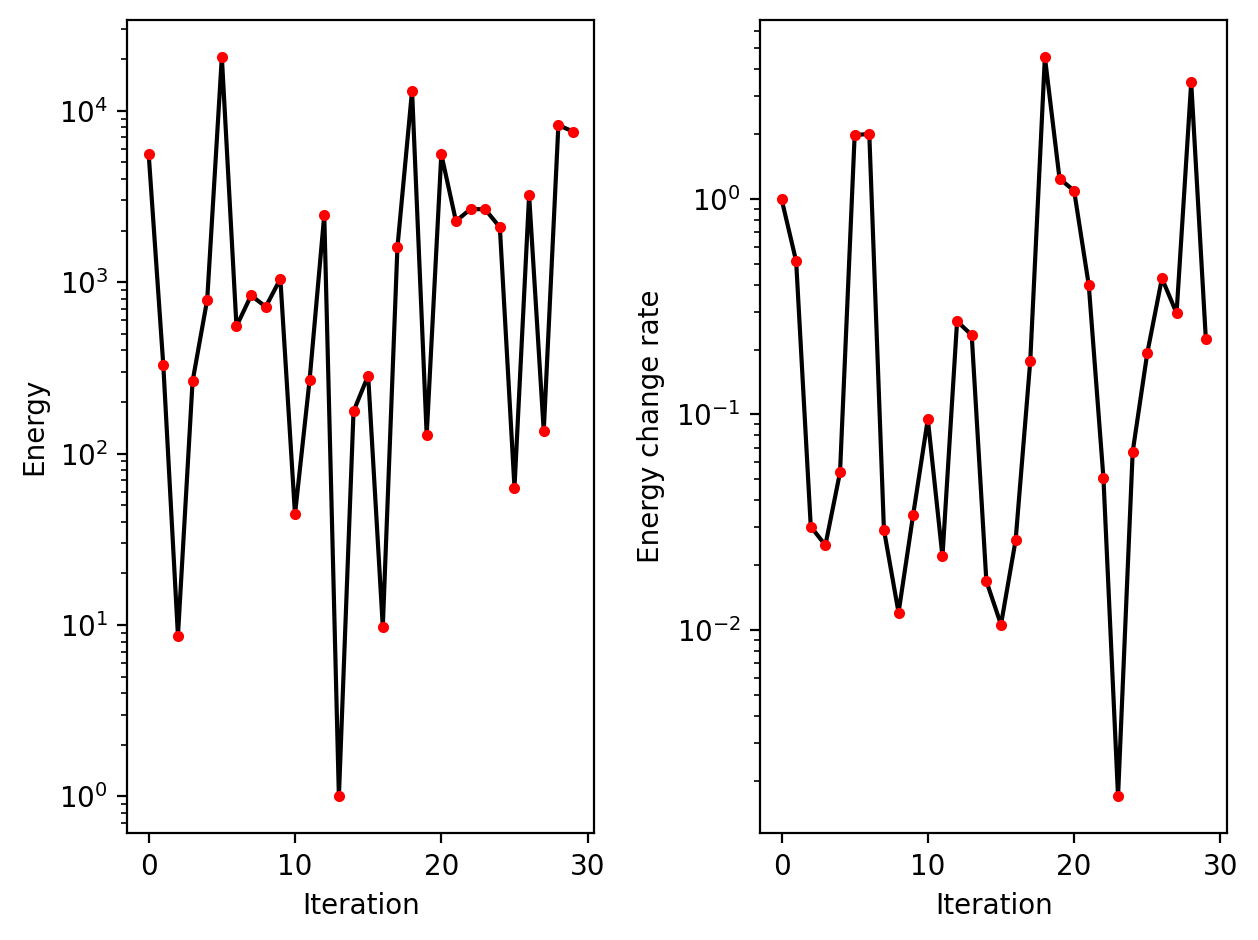

In [14]:
dyn.pl.plot_energy(adata)

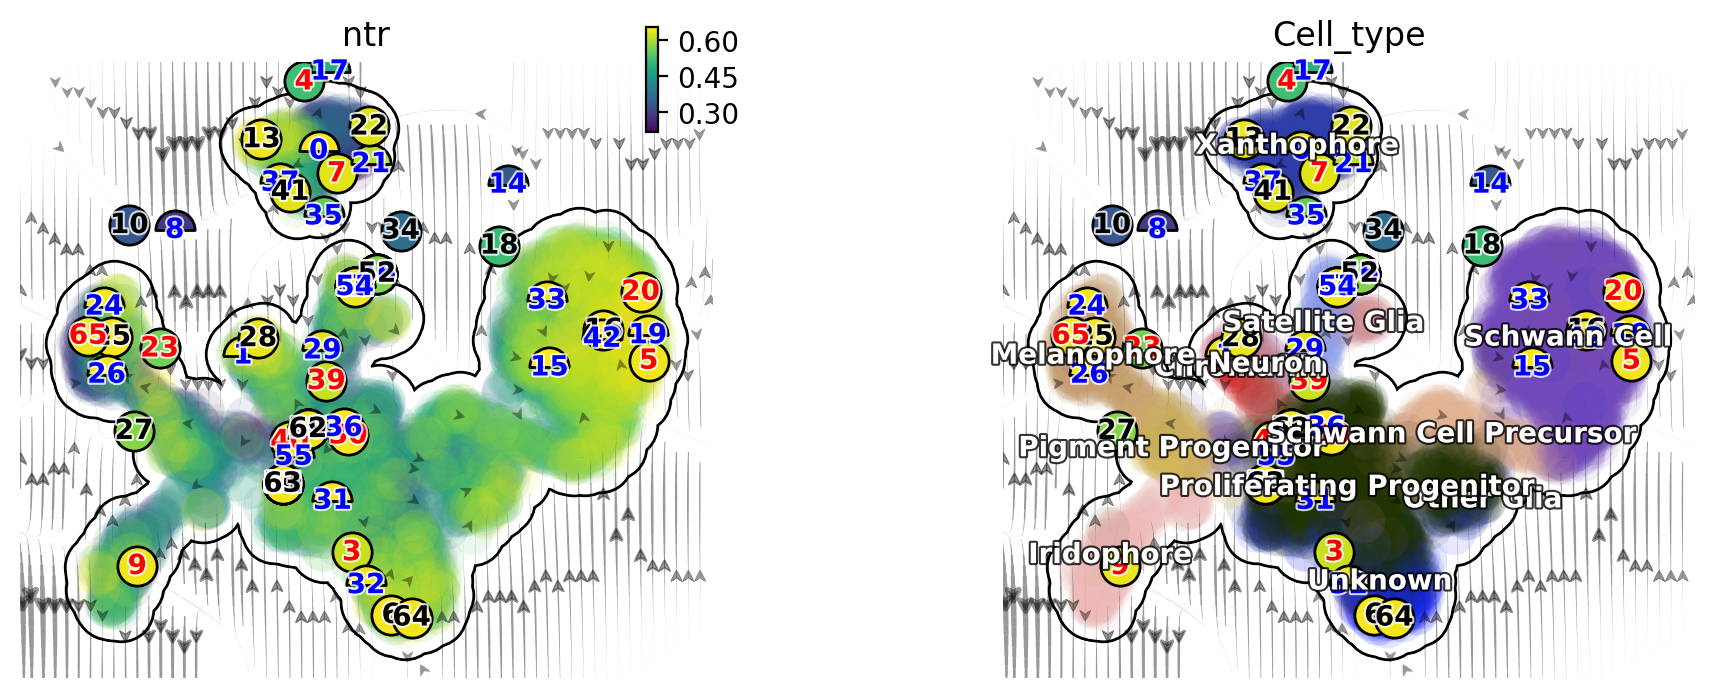

In [15]:
dyn.pl.topography(adata, basis='umap', background='white', color=['ntr', 'Cell_type'], streamline_color='black', show_legend='on data', frontier=True)